## **Develop Machine Learning Models to Forecast Fair Market Value for Houses in  Californa State**

Algorithms of Linear Regression, Ridge, Lasso, Decision Tree, Random Forest and XGBoost are implemented in this Notebook.

This dataset:  housing.csv contains information from the 1990 California census. 

In [1]:
# Importing the libraries :

# Explore the Data :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Data preprocessing Libraries :
from sklearn.preprocessing import LabelEncoder
# from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline

# Regression Libraries :
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing, linear_model, metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#from google.colab import files
#uploaded = files.upload()

### Import the DataSet (csv file ):
1st download the dataset: housing.csv from the link 
https://github.com/ageron/handson-ml/tree/master/datasets/housing
to your computer's Hard Drive and then upload to the colab's local drive

In [3]:
# read the dataset :
df_house = pd.read_csv('/content/housing.csv')
df_home = df_house

In [4]:
# Get heading of cloumns
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
List_of_Labels = list(df_house['median_house_value'].head(10))
List_of_Labels

[452600.0,
 358500.0,
 352100.0,
 341300.0,
 342200.0,
 269700.0,
 299200.0,
 241400.0,
 226700.0,
 261100.0]

Notes :                          
1. A 'Regression' problem because the label 'median_house_value' is continuous.           
2. Apply all types of regression methods and predict the median_house_value.               
3. Compare which type of regression is best for this prediction.

### Sample of the Data Set :

In [6]:
df_house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df_house.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#count the values of the columns
df_house.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [10]:
df_house.shape

(20640, 10)

### Checking for NaN value :

In [11]:
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

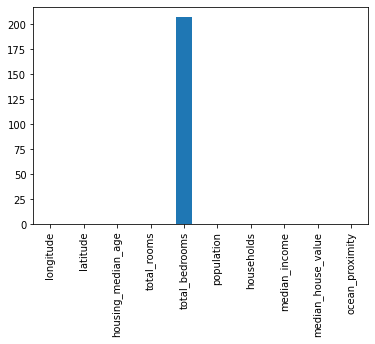

In [12]:
df_house.isnull().sum().plot(kind = 'bar')

NaN values can be seen in coulmn named 'total_bedrooms' so as to deal with that 

In [13]:
# filling zero on the place of NaN values in the data set 
df_house['total_bedrooms'].fillna(0,inplace = True)

In [14]:
df_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Exploratory Data Analysis (EDA)

[]

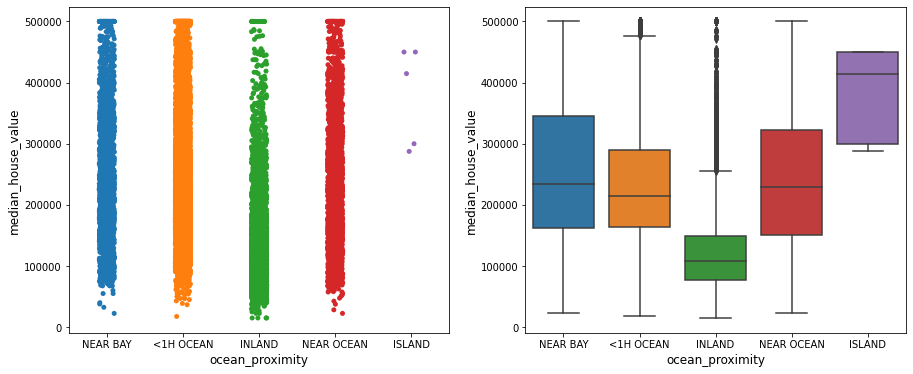

In [15]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace = .25)
plt.subplot(1,2,1)
plt.xlabel('ocean_proximity',fontsize=12)
plt.ylabel('median_house_value',fontsize=12)
sns.stripplot(data=df_house,x='ocean_proximity',y='median_house_value',)
plt.subplot(1,2,2)
plt.xlabel('ocean_proximity',fontsize=12)
plt.ylabel('median_house_value',fontsize=12)
sns.boxplot(data=df_house,x='ocean_proximity',y='median_house_value')
plt.plot()

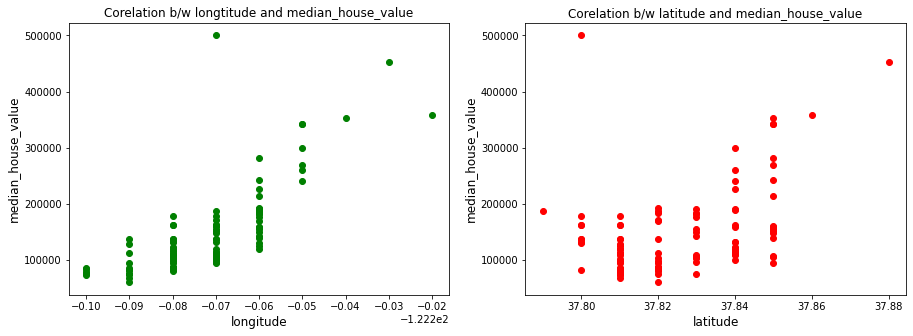

In [16]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace = .25)
plt.subplot(1,2,1)
plt.title('Corelation b/w longtitude and median_house_value')
plt.xlabel('longitude',fontsize=12)
plt.ylabel('median_house_value',fontsize=12)
plt.scatter(df_house['longitude'].head(100),df_house['median_house_value'].head(100),color='g')
plt.subplot(1,2,2)
plt.title('Corelation b/w latitude and median_house_value')
plt.xlabel('latitude',fontsize=12)
plt.ylabel('median_house_value',fontsize=12)
plt.scatter(df_house['latitude'].head(100),df_house['median_house_value'].head(100),color='r')

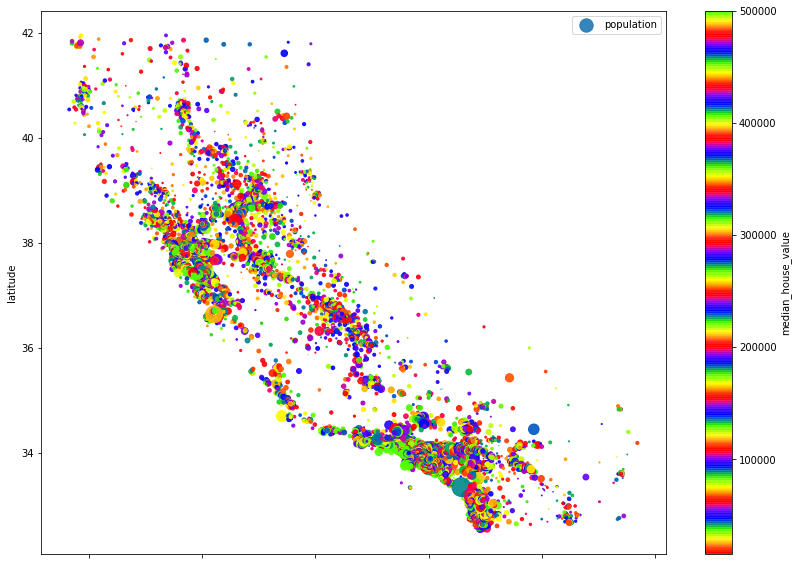

In [17]:
df_house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.9, 
    s=df_house['population']/100, label='population', figsize=(14,10), 
    c='median_house_value', cmap=plt.get_cmap('prism'), colorbar=True)

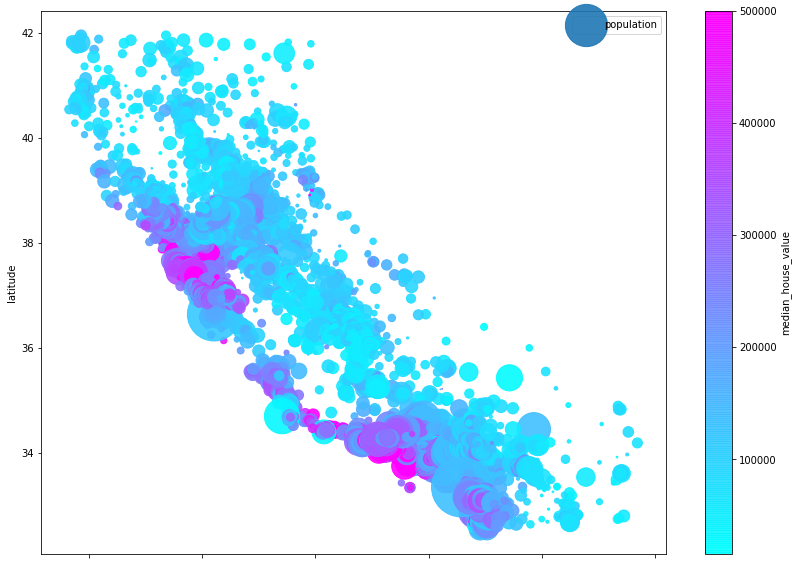

In [18]:
df_house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.9, 
    s=df_house['population']/10, label='population', figsize=(14,10), 
    c='median_house_value', cmap=plt.get_cmap('cool'), colorbar=True)

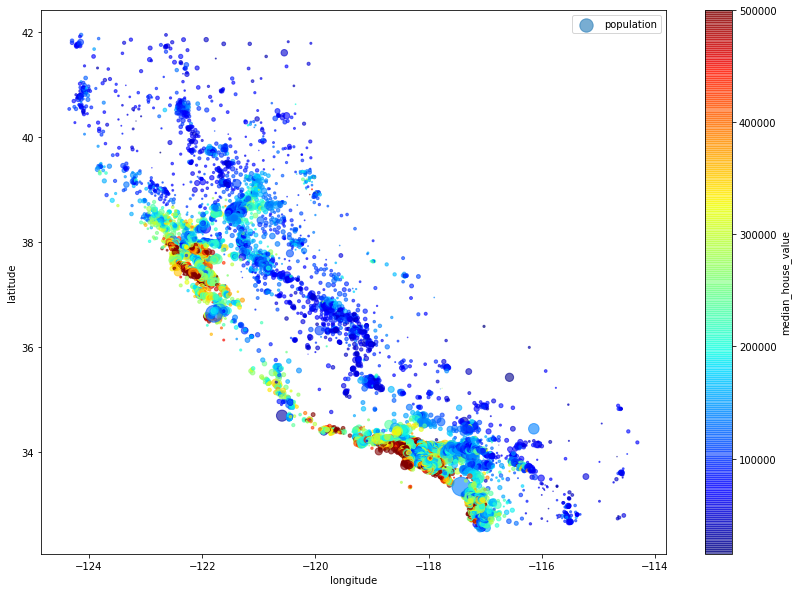

In [19]:
df_house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.6,
    s=df_house["population"]/100, label="population", figsize=(14, 10),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
# save_fig("housing_prices_scatterplot")

In [20]:
import urllib.request 
import os

In [21]:
PROJECT_ROOT_DIR = "."
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)

In [22]:
# Download the California image
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f784e0dc748>)

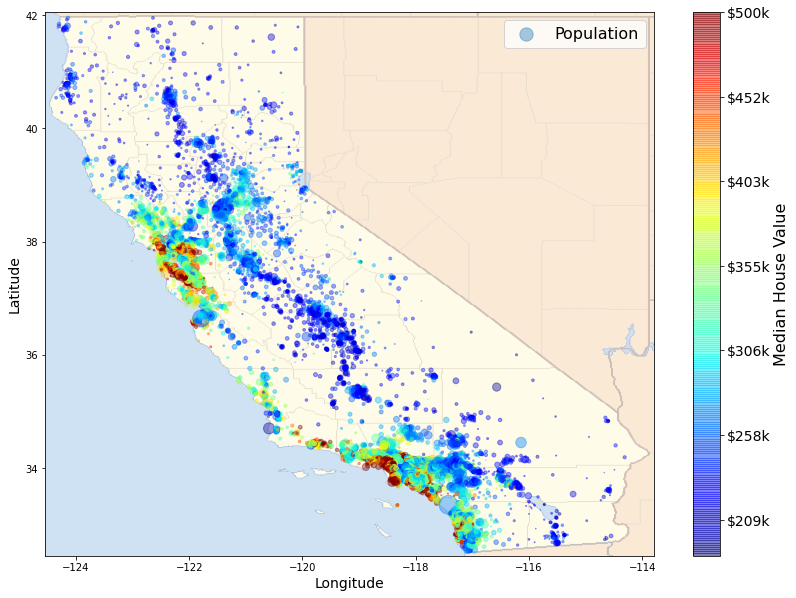

In [23]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = df_house.plot(kind="scatter", x="longitude", y="latitude", figsize=(14,10),
                       s=df_house['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df_house["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


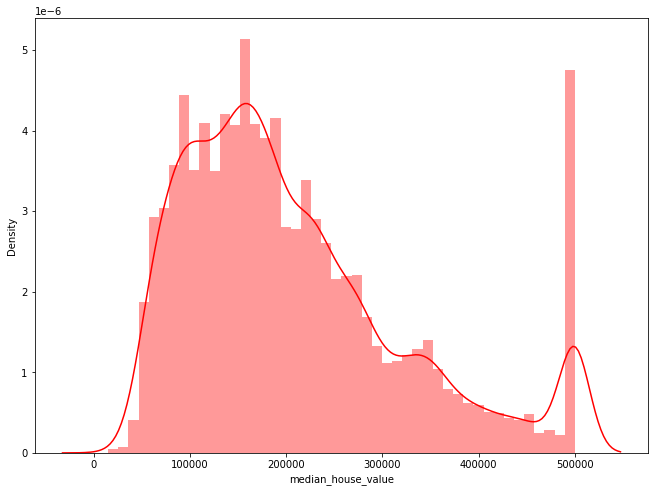

In [24]:
plt.figure(figsize=(11,8))
sns.distplot(df_house['median_house_value'],color='red')
plt.show()

In [25]:
df_house[df_house['median_house_value']>450000]['median_house_value'].value_counts().head()
# df_house[df_house['median_house_value']>510000]['median_house_value'].value_counts().head()

500001.0    965
500000.0     27
475000.0      8
483300.0      6
466700.0      4
Name: median_house_value, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


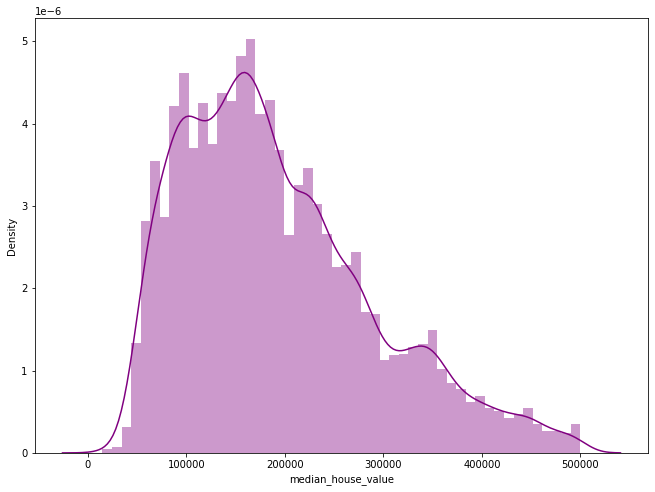

In [26]:
# df_house=df_house.loc[df_house['median_house_value']<501000,:]
df_house=df_house.loc[df_house['median_house_value']<500001,:]
df_house=df_house[df_house['population']<25000]
plt.figure(figsize=(11,8))
sns.distplot(df_house['median_house_value'],color='purple')
plt.show()

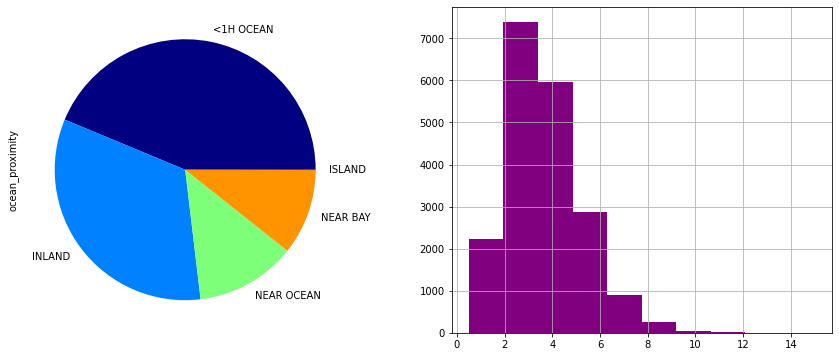

In [27]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace = .25)
plt.subplot(1,2,1)
df_house['ocean_proximity'].value_counts().plot(kind = 'pie',colormap = 'jet')
plt.subplot(1,2,2)
df_house['median_income'].hist(color='purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f784e1102e8>,
      dtype=object)

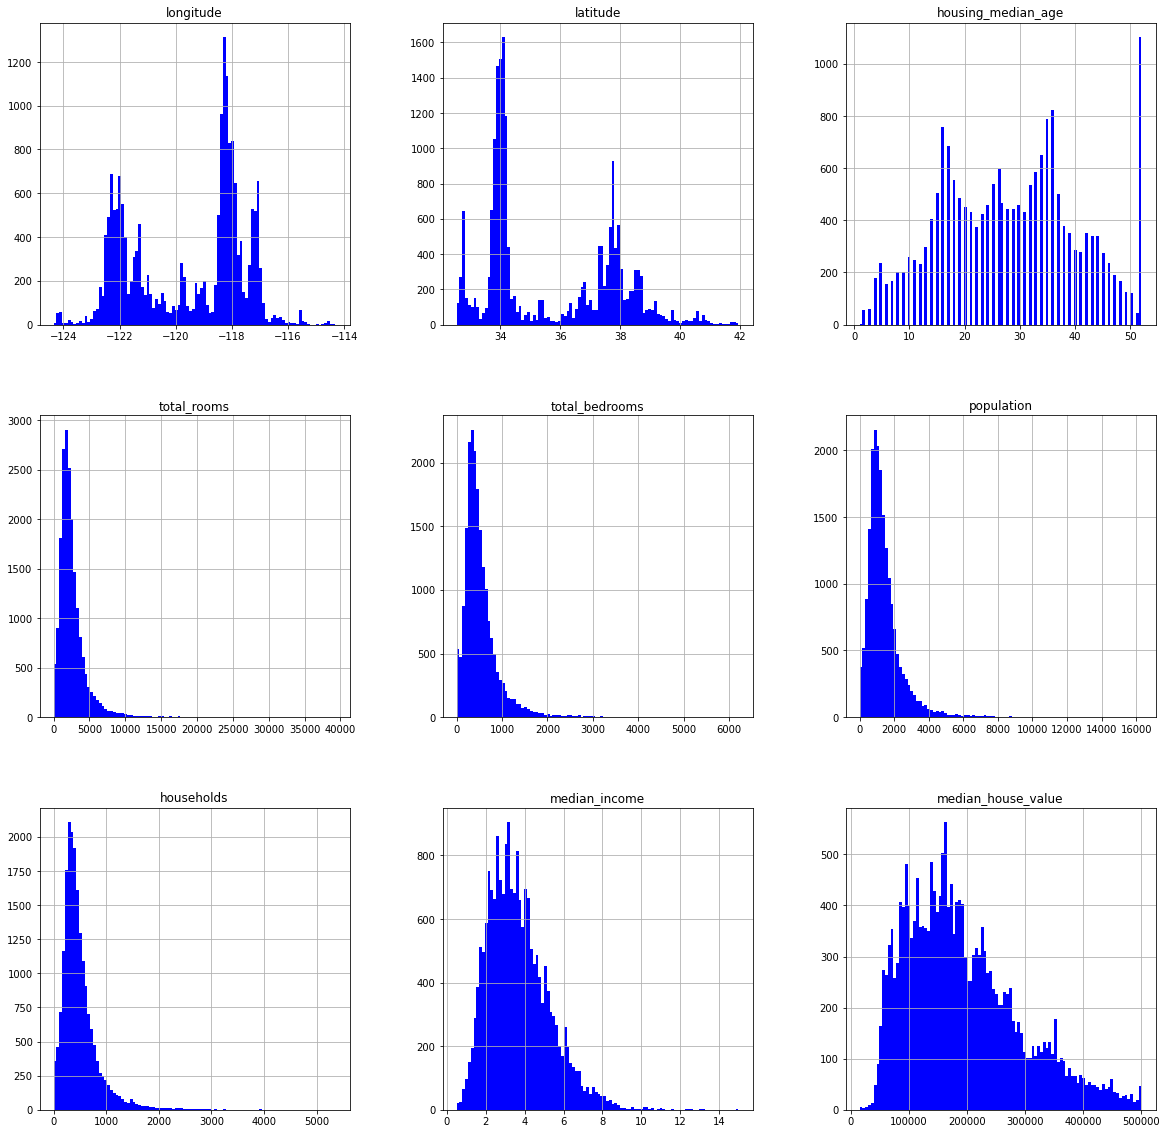

In [28]:
df_house.hist(bins=100, figsize=(20,20) , color = 'b')

### Correlation Matrics 

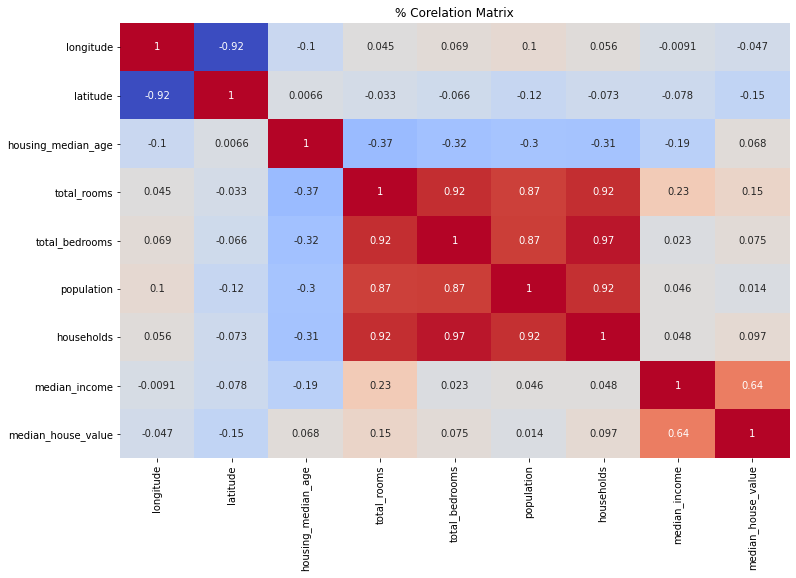

In [29]:
# Heat Map
# plt.figure(figsize=(10,4))
# sns.heatmap(cbar=False,annot=True,data=df_house.corr(),cmap='Blues')

plt.figure(figsize=(12,8))
sns.heatmap(cbar=False,annot=True,data=df_house.corr(),cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

# Data Preprocessing :

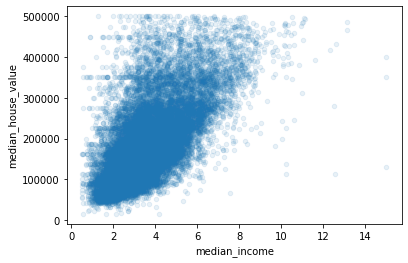

In [30]:
df_house.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [31]:
df_house["rooms_per_household"] = df_house["total_rooms"]/df_house["households"]
df_house["bedrooms_per_room"] = df_house["total_bedrooms"]/df_house["total_rooms"]
df_house["population_per_household"]=df_house["population"]/df_house["households"]
corr_matrix = df_house.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.642592
total_rooms                 0.145076
rooms_per_household         0.109674
households                  0.096620
total_bedrooms              0.074654
housing_median_age          0.067867
population                  0.014320
population_per_household   -0.021448
longitude                  -0.046673
latitude                   -0.148313
bedrooms_per_room          -0.201995
Name: median_house_value, dtype: float64

### Encoding the Categorical values :

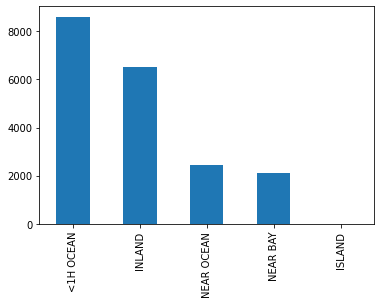

In [32]:
df_house['ocean_proximity'].value_counts().plot(kind = 'bar')

[]

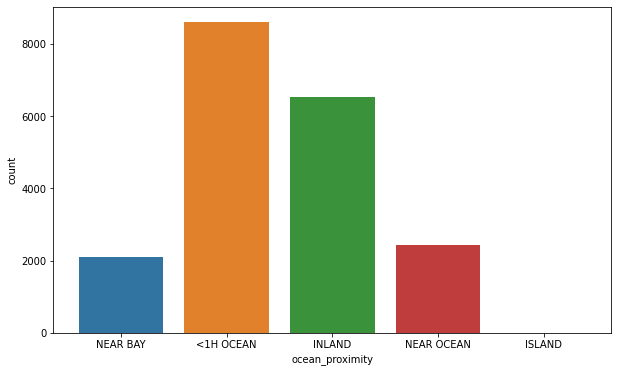

In [33]:
#barplot on ocean_proximity categories
plt.figure(figsize=(10,6))
sns.countplot(data=df_house,x='ocean_proximity')
plt.plot()

In [34]:
x = df_home.copy()

In [35]:
x.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [36]:
x.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [37]:
df_home = pd.get_dummies(df_home,columns=['ocean_proximity'])

In [38]:
df_home.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [39]:
df_home.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f784a5694e0>,
      dtype=object)

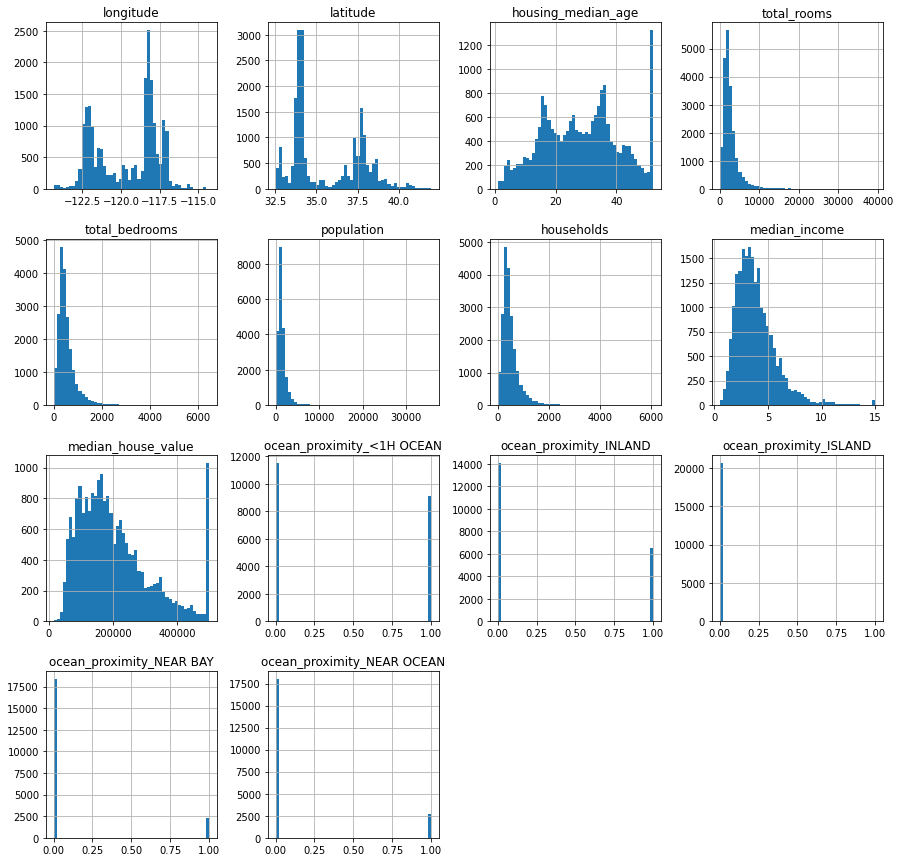

In [40]:
df_home.hist(bins=50,figsize=(15, 15))

In [41]:
df_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

In [42]:
# Test model
x = df_home.copy()
y = x['median_house_value']
x1 = df_home.copy()
x1.drop(columns=['total_rooms','total_bedrooms','population','households','ocean_proximity_ISLAND'],inplace=True)
x.drop(columns=['median_house_value','total_rooms',
                'total_bedrooms','population','households','ocean_proximity_ISLAND'],inplace=True)
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

### Spliting the data set into train and test set :

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
print(len(xtrain), len(xtest), len(ytrain), len(ytest) )

16512 4128 16512 4128


In [44]:
print(xtrain.shape); print(xtest.shape)

(16512, 8)
(4128, 8)


# Calculate: RMSE (Root Mean Square Error), Accuracy %, and  rsq (R Square) for each regression method.


### Linear Regression :

Define a dictionary for gathering test results of all regression test models
with respective RMSE, Accuracy%, and R-Square.

In [45]:
dic = {}
model_linear = make_pipeline(preprocessing.StandardScaler(),linear_model.LinearRegression())
scores = cross_val_score(model_linear, xtrain, ytrain, cv=10)

model_linear.fit(xtrain, ytrain)
pred = model_linear.predict(xtest)
RMSE  = np.sqrt(mean_squared_error(ytest, pred))

accuracy = scores.mean() * 100

rsq = r2_score(ytest, pred)

dic['LinearRegression'] = (RMSE, accuracy, rsq)

print('rmse for Linear Regression is : ', RMSE)
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy, scores.std() * 2))
print('r squared value is : ', rsq)

rmse for Linear Regression is :  72517.53513045599
Accuracy: 60.83 (+/- 0.04)
r squared value is :  0.5990828992053411


Text(0, 0.5, 'Predicted Result')

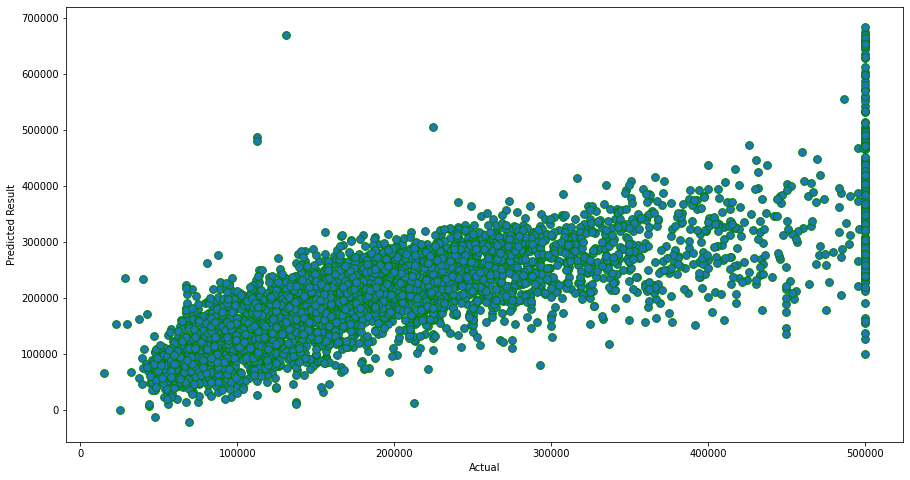

In [46]:
fig = plt.figure(figsize=(15,8))
plt.scatter(ytest, pred, marker="o", edgecolors = "g", s=60)
plt.xlabel("Actual")
plt.ylabel("Predicted Result")

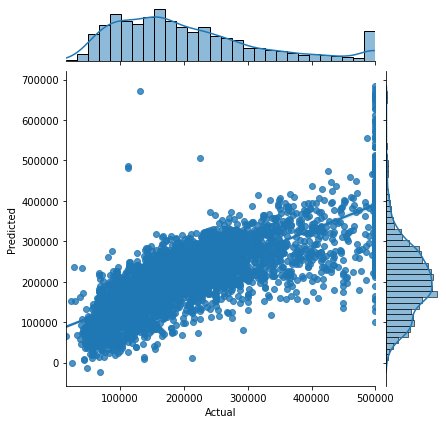

In [47]:
test = pd.DataFrame({'Predicted':pred,'Actual':ytest})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)

### Decision Tree Regression :

In [48]:
model_dt = make_pipeline(preprocessing.StandardScaler(),DecisionTreeRegressor(random_state=0))
scores = cross_val_score(model_dt, xtrain, ytrain, cv=10)

model_dt.fit(xtrain, ytrain)
pred = model_dt.predict(xtest)
RMSE = np.sqrt(mean_squared_error(ytest, pred))

accuracy = scores.mean() * 100

rsq = r2_score(ytest, pred)

dic['DecisionTree'] = (RMSE, accuracy, rsq)
print('rmse for Decision Tree Regression: ', RMSE)
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy, scores.std() * 2))
print('r squared value is : ',rsq)

rmse for Decision Tree Regression:  64197.975058327436
Accuracy: 66.72 (+/- 0.04)
r squared value is :  0.6857963885454617


Text(0, 0.5, 'Predicted Result')

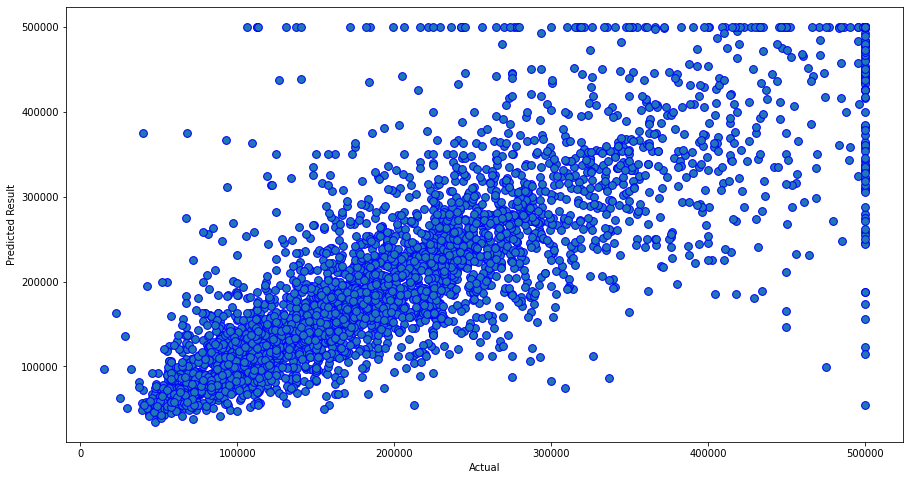

In [49]:
fig = plt.figure(figsize=(15,8))
plt.scatter(ytest, pred, marker="o", edgecolors = "b", s=60)
plt.xlabel("Actual")
plt.ylabel("Predicted Result")


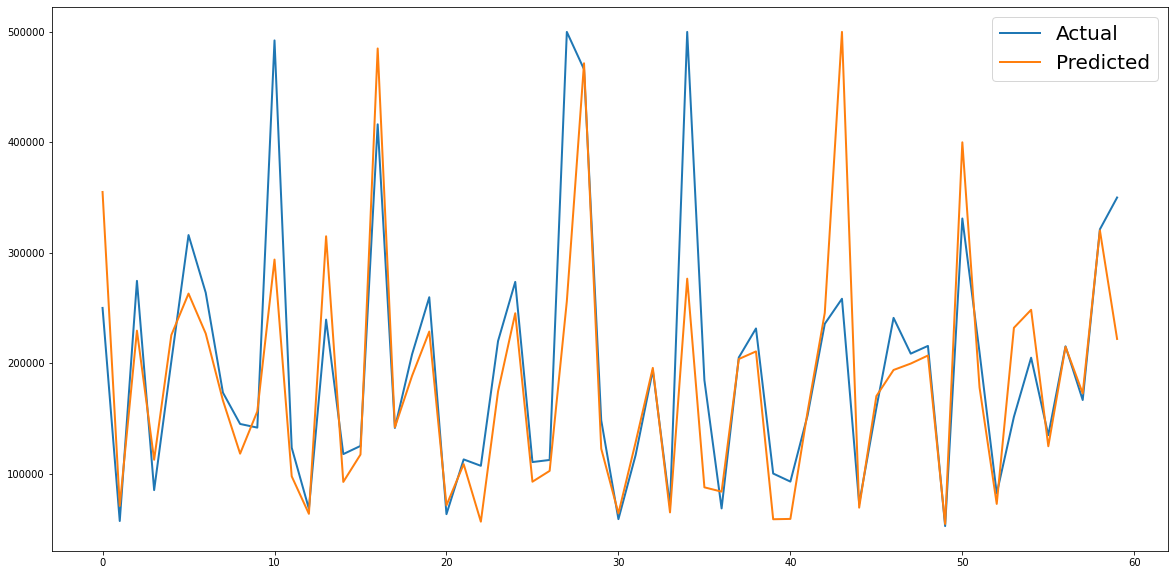

In [50]:
#Graphically
grp = pd.DataFrame({'prediction':pred,'Actual':ytest})
grp = grp.reset_index()
grp = grp.drop(['index'],axis=1)
plt.figure(figsize=(20,10))
plt.plot(grp[:60],linewidth=2)
plt.legend(['Actual','Predicted'],prop={'size': 20})

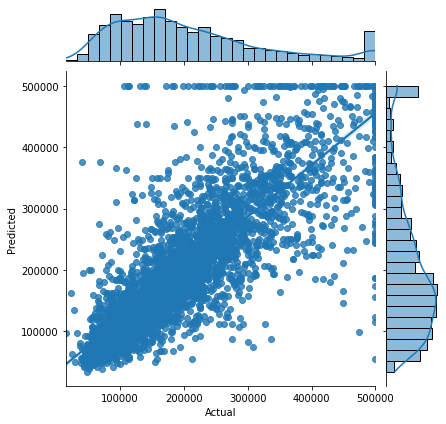

In [51]:
test = pd.DataFrame({'Predicted':pred,'Actual':ytest})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)

### Random forest Regression :

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Depth = 2
model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=2, random_state=0))
scores = cross_val_score(model_rf, xtrain, ytrain, cv=10)

model_rf.fit(xtrain, ytrain)
pred_test = model_rf.predict(xtest)
RMSE = np.sqrt(mean_squared_error(ytest, pred))

accuracy = scores.mean() * 100

rsq = r2_score(ytest, pred_test)

dic['RFD_2'] = (RMSE, accuracy, rsq)
print('rmse for Radom Forest Regression Depth 2: ', RMSE)
print("Depth: 2  Accuracy: %0.2f (+/- %0.2f)" % (accuracy, scores.std() * 2))
print('r squared value is : ', rsq)

rmse for Radom Forest Regression Depth 2:  64197.975058327436
Depth: 2  Accuracy: 50.95 (+/- 0.04)
r squared value is :  0.5024957884374093


In [53]:
# Depth = 5
model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=5, random_state=0))
scores = cross_val_score(model_rf, xtrain, ytrain, cv=10)

model_rf.fit(xtrain, ytrain)
pred = model_rf.predict(xtest)
RMSE = np.sqrt(mean_squared_error(ytest, pred))

accuracy = scores.mean() * 100

rsq = r2_score(ytest, pred)

dic['RFD_5'] = (RMSE, accuracy, rsq)
print('rmse for Radom Forest Regression Depth 5: ', RMSE)
print("Depth: 5  Accuracy: %0.2f (+/- %0.2f)" % (accuracy, scores.std() * 2))
print('r squared value is : ', rsq)

rmse for Radom Forest Regression Depth 5:  67381.702591189
Depth: 5  Accuracy: 65.22 (+/- 0.04)
r squared value is :  0.6538594542782155


In [54]:
# Depth = 10
model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=10, random_state=0))
scores = cross_val_score(model_rf, xtrain, ytrain, cv=10)

model_rf.fit(xtrain, ytrain)
pred = model_rf.predict(xtest)
RMSE = np.sqrt(mean_squared_error(ytest, pred))

accuracy = scores.mean() * 100

rsq = r2_score(ytest, pred)

dic['RFD_10'] = (RMSE, accuracy, rsq)
print('rmse for Radom Forest Regression Depth 10: ', RMSE)
print("Depth: 10  Accuracy: %0.2f (+/- %0.2f)" % (accuracy, scores.std() * 2))
print('r squared value is : ', rsq)

rmse for Radom Forest Regression Depth 10:  53058.27371463056
Depth: 10  Accuracy: 79.12 (+/- 0.03)
r squared value is :  0.7853777493839729


In [55]:
# Depth = 20
model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=20, random_state=0))
scores = cross_val_score(model_rf, xtrain, ytrain, cv=10)

model_rf.fit(xtrain, ytrain)
pred = model_rf.predict(xtest)
RMSE = np.sqrt(mean_squared_error(ytest, pred))

accuracy = scores.mean() * 100

rsq = r2_score(ytest, pred)

dic['RFD_20'] = (RMSE, accuracy, rsq)
print('rmse for Radom Forest Regression Depth 20: ', RMSE)
print("Depth: 20  Accuracy: %0.2f (+/- %0.2f)" % (accuracy, scores.std() * 2))
print('r squared value is : ', rsq)

rmse for Radom Forest Regression Depth 20:  49052.827287106
Depth: 20  Accuracy: 82.24 (+/- 0.02)
r squared value is :  0.8165589188436452


In [56]:
# Depth = 50
model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=50, random_state=0))
scores = cross_val_score(model_rf, xtrain, ytrain, cv=10)

model_rf.fit(xtrain, ytrain)
pred = model_rf.predict(xtest)
RMSE = np.sqrt(mean_squared_error(ytest, pred))

accuracy = scores.mean() * 100

rsq = r2_score(ytest, pred)

dic['RFD_50'] = (RMSE, accuracy, rsq)
print('rmse for Radom Forest Regression Depth 50: ', RMSE)
print("Depth: 50  Accuracy: %0.2f (+/- %0.2f)" % (accuracy, scores.std() * 2))
print('r squared value is : ', rsq)

rmse for Radom Forest Regression Depth 50:  49008.04087024734
Depth: 50  Accuracy: 82.26 (+/- 0.02)
r squared value is :  0.8168937382060257


Text(0, 0.5, 'Predicted Result')

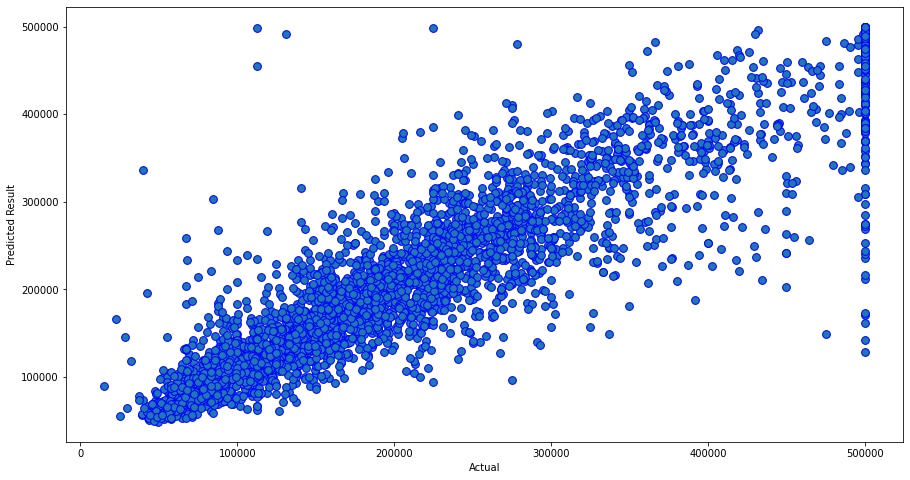

In [57]:
fig = plt.figure(figsize=(15,8))
plt.scatter(ytest, pred, marker="o", edgecolors = "b", s=60)
plt.xlabel("Actual")
plt.ylabel("Predicted Result")

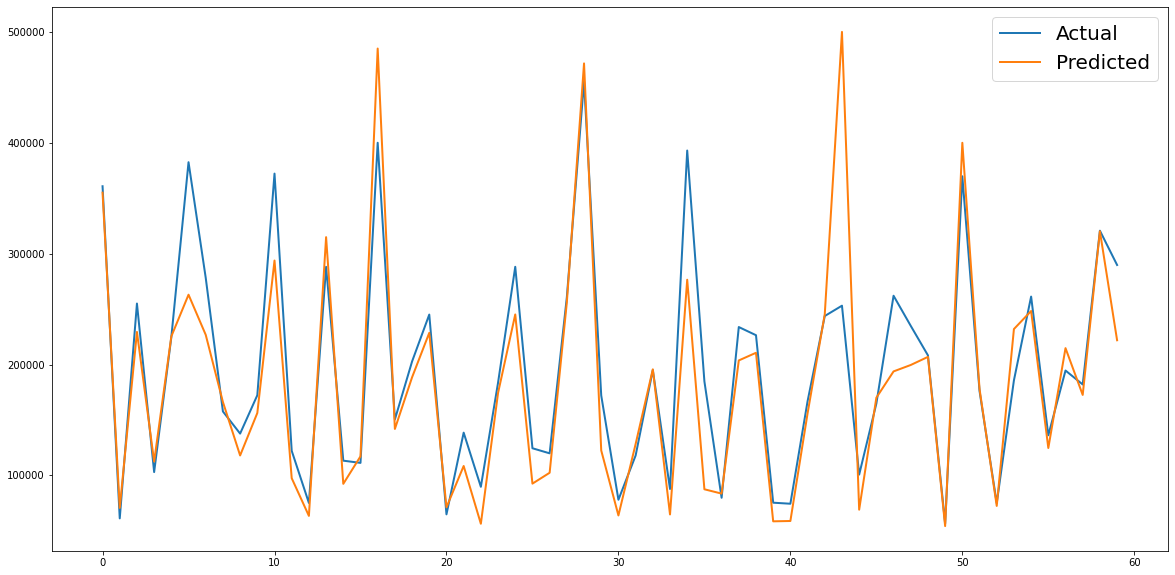

In [58]:
#Graphically
grp = pd.DataFrame({'prediction':pred,'Actual':ytest})
grp = grp.reset_index()
grp = grp.drop(['index'],axis=1)
plt.figure(figsize=(20,10))
plt.plot(grp[:60],linewidth=2)
plt.legend(['Actual','Predicted'],prop={'size': 20})

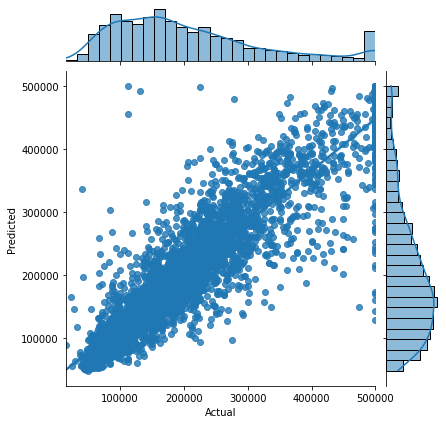

In [59]:
test = pd.DataFrame({'Predicted':pred,'Actual':ytest})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)

### XGBoost Regression 

In [60]:
#import xgboost as xgb
#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1,eta=0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 2000)

In [61]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1,eta=0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 2000)

In [62]:
model_xgb = make_pipeline(preprocessing.StandardScaler(),xg_reg)
scores = cross_val_score(model_xgb, xtrain, ytrain, cv=10)

model_xgb.fit(xtrain, ytrain)
pred = model_xgb.predict(xtest)
RMSE = np.sqrt(mean_squared_error(ytest, pred))

accuracy = scores.mean() * 100

rsq = r2_score(ytest, pred)

dic['XGB'] = (RMSE, accuracy, rsq)
print('rmse for Radom Forest Regression Depth 50: ', RMSE)
print("Depth: 50  Accuracy: %0.2f (+/- %0.2f)" % (accuracy, scores.std() * 2))
print('r squared value is : ', rsq)

rmse for Radom Forest Regression Depth 50:  47091.344201613894
Depth: 50  Accuracy: 83.20 (+/- 0.02)
r squared value is :  0.8309361760357201


Text(0, 0.5, 'Predicted Result')

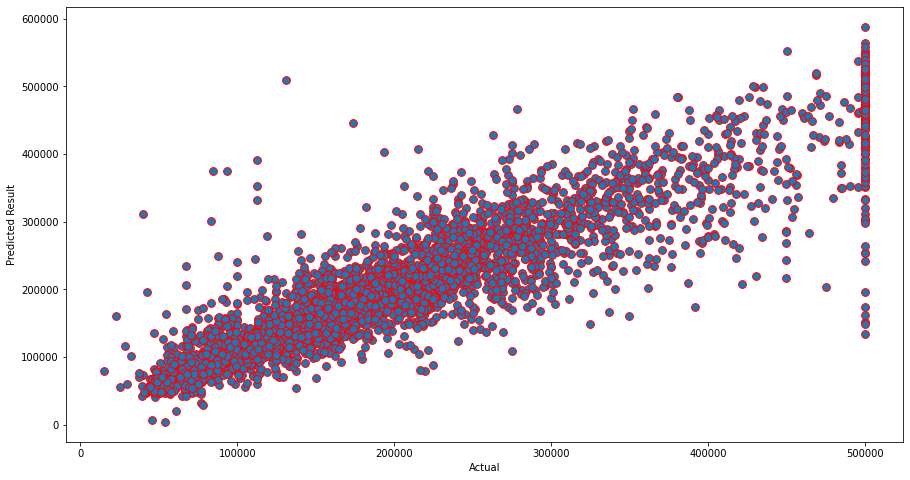

In [63]:
fig = plt.figure(figsize=(15,8))
plt.scatter(ytest, pred, marker="o", edgecolors = "r", s=60)
plt.xlabel("Actual")
plt.ylabel("Predicted Result")

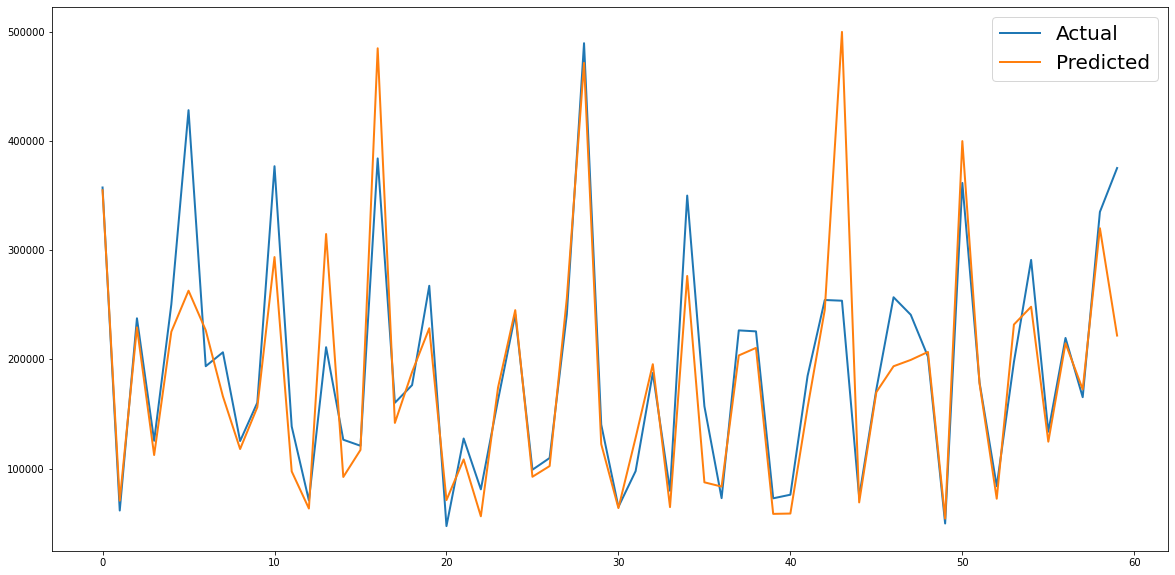

In [64]:
#Graphically
grp = pd.DataFrame({'prediction':pred,'Actual':ytest})
grp = grp.reset_index()
grp = grp.drop(['index'],axis=1)
plt.figure(figsize=(20,10))
plt.plot(grp[:60],linewidth=2)
plt.legend(['Actual','Predicted'],prop={'size': 20})

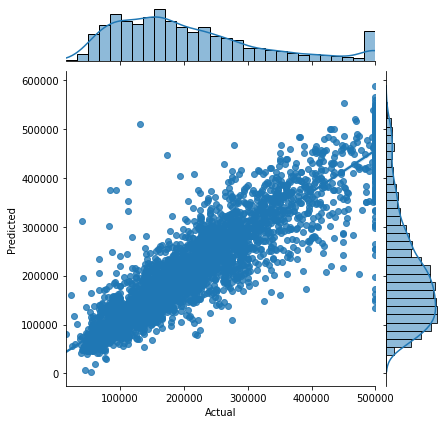

In [65]:
test = pd.DataFrame({'Predicted':pred,'Actual':ytest})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)

### Ridge Regression

In [66]:
# Ridge Regression with Grid Search:
ridge_reg = linear_model.Ridge()
params_Ridge = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(xtrain, ytrain)
print(Ridge_GS.best_params_)

model_ridge = make_pipeline(preprocessing.StandardScaler(),linear_model.Ridge(random_state=0, **Ridge_GS.best_params_))
scores = cross_val_score(model_ridge, xtrain, ytrain, cv=10)

model_ridge.fit(xtrain, ytrain)
pred = model_ridge.predict(xtest)
RMSE = np.sqrt(mean_squared_error(ytest, pred))

accuracy = scores.mean() * 100

rsq = r2_score(ytest, pred)

dic['Ridge Regression'] = (RMSE, accuracy, rsq)
print('rmse for Ridge Regression: ', RMSE)
print("Depth: 10  Accuracy: %0.2f (+/- %0.2f)" % (accuracy, scores.std() * 2))
print('r squared value is : ', rsq)

{'alpha': 0.01, 'fit_intercept': True, 'solver': 'cholesky'}
rmse for Ridge Regression:  72517.53461475622
Depth: 10  Accuracy: 60.83 (+/- 0.04)
r squared value is :  0.5990829049074888


#### Lasso Regression

In [67]:
# Lasso Regression with Grid Search:
lasso_reg = linear_model.Lasso()
params_Lasso = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20] , "fit_intercept": [True, False]}
lasso_GS = GridSearchCV(lasso_reg, param_grid=params_Lasso, n_jobs=-1)
lasso_GS.fit(xtrain, ytrain)
print(lasso_GS.best_params_)

model_lasso = make_pipeline(preprocessing.StandardScaler(),linear_model.Lasso(random_state=0, **lasso_GS.best_params_, max_iter=1e+5))
scores = cross_val_score(model_lasso, xtrain, ytrain, cv=10)

model_lasso.fit(xtrain, ytrain)
pred = model_lasso.predict(xtest)
RMSE = np.sqrt(mean_squared_error(ytest, pred))

accuracy = scores.mean() * 100

rsq = r2_score(ytest, pred)

dic['Lasso Regression'] = (RMSE, accuracy, rsq)
print('rmse for Ridge Regression: ', RMSE)
print("Depth: 10  Accuracy: %0.2f (+/- %0.2f)" % (accuracy, scores.std() * 2))
print('r squared value is : ', rsq)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43087147428681.57, tolerance: 22062155877.7318
  positive)


{'alpha': 1e-15, 'fit_intercept': True}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38511115233178.766, tolerance: 19864360438.602028
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39003871296753.07, tolerance: 19944187166.080627
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38823080369920.586, tolerance: 19676048630.203243
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3862748

rmse for Ridge Regression:  72517.5351304559
Depth: 10  Accuracy: 60.83 (+/- 0.04)
r squared value is :  0.5990828992053421


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43069199073066.09, tolerance: 22062155877.7318
  positive)


Text(0, 0.5, 'Predicted Result')

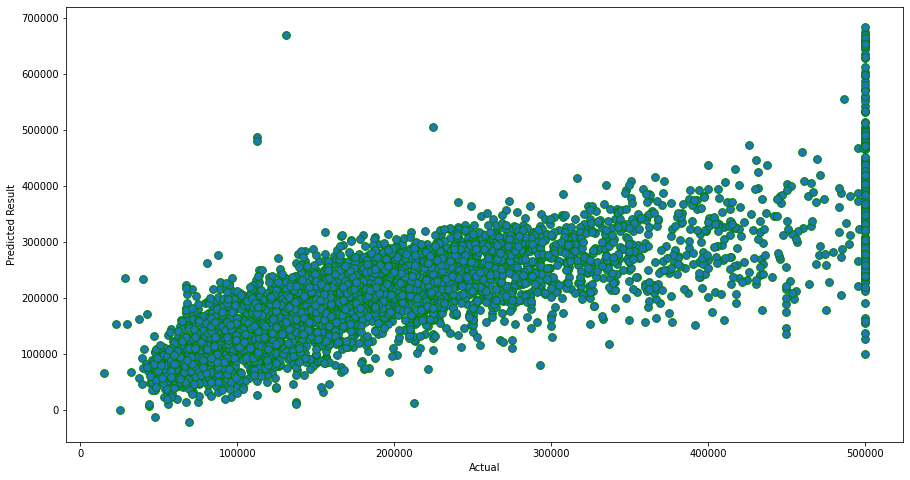

In [68]:
fig = plt.figure(figsize=(15,8))
plt.scatter(ytest, pred, marker="o", edgecolors = "g", s=60)
plt.xlabel("Actual")
plt.ylabel("Predicted Result")

## Final Output Comparison

In [69]:
result = pd.DataFrame(zip(ytest,pred),columns=['Actual','Predicted'])

In [70]:
result

,Actual,Predicted
0,355000.0,211073.202076
1,70700.0,89246.839047
2,229400.0,267912.979455
3,112500.0,173935.374631
4,225400.0,281754.980057
...,...,...
4123,68200.0,88965.558660
4124,225000.0,182022.591494
4125,350000.0,296022.293435
4126,227300.0,267428.393060


In [71]:
accuracy_model = pd.DataFrame(dic,index=['RMSE', 'Training_Accuracy', 'R_Square'])
accuracy_model = accuracy_model.T
accuracy_model

,RMSE,Training_Accuracy,R_Square
LinearRegression,72517.535130,60.832412,0.599083
DecisionTree,64197.975058,66.721876,0.685796
RFD_2,64197.975058,50.953119,0.502496
RFD_5,67381.702591,65.217515,0.653859
RFD_10,53058.273715,79.121765,0.785378
RFD_20,49052.827287,82.240358,0.816559
RFD_50,49008.040870,82.257539,0.816894
XGB,47091.344202,83.204820,0.830936
Ridge Regression,72517.534615,60.832422,0.599083
Lasso Regression,72517.535130,60.832412,0.599083


In [72]:
accuracy_model.sort_values(by=['RMSE'],inplace=True)

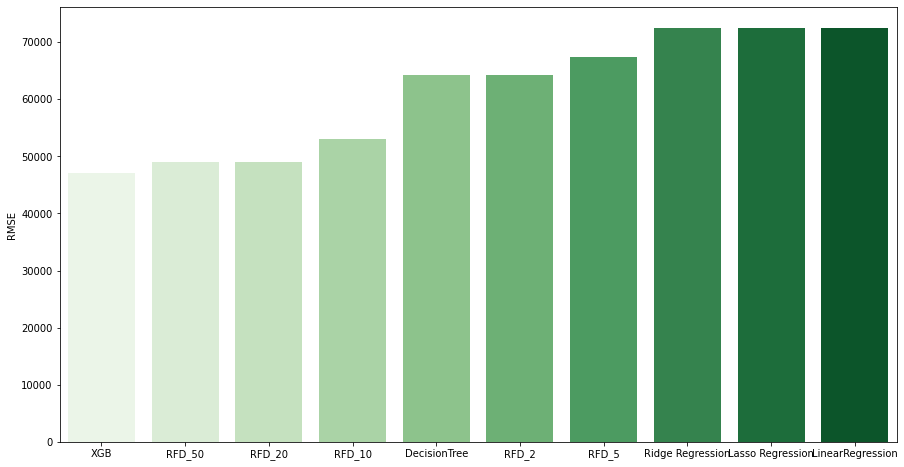

In [73]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x=accuracy_model.index,y='RMSE',data=accuracy_model,ax=ax,palette='Greens')

In [74]:
accuracy_model.sort_values(by=['Training_Accuracy'],inplace=True)

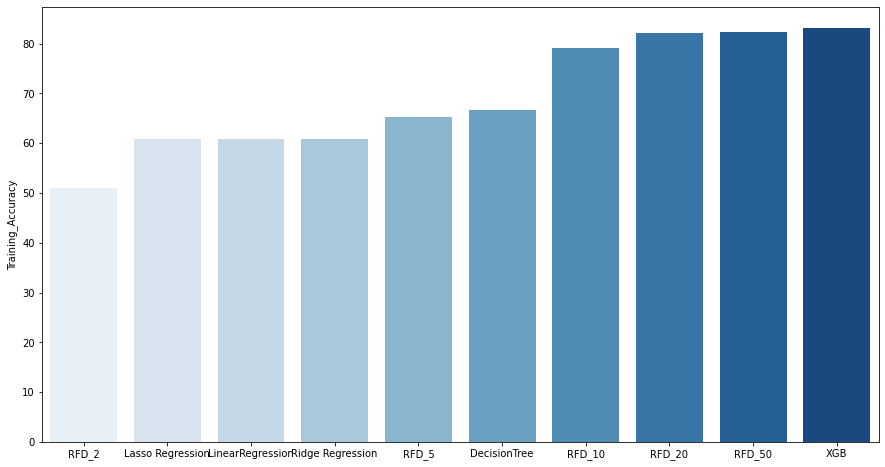

In [75]:
fig1, ax1 = pyplot.subplots(figsize=(15,8))
sns.barplot(x=accuracy_model.index,y='Training_Accuracy',data=accuracy_model,ax=ax1,palette='Blues')

In [76]:
accuracy_model.sort_values(by=['R_Square'], inplace=True)

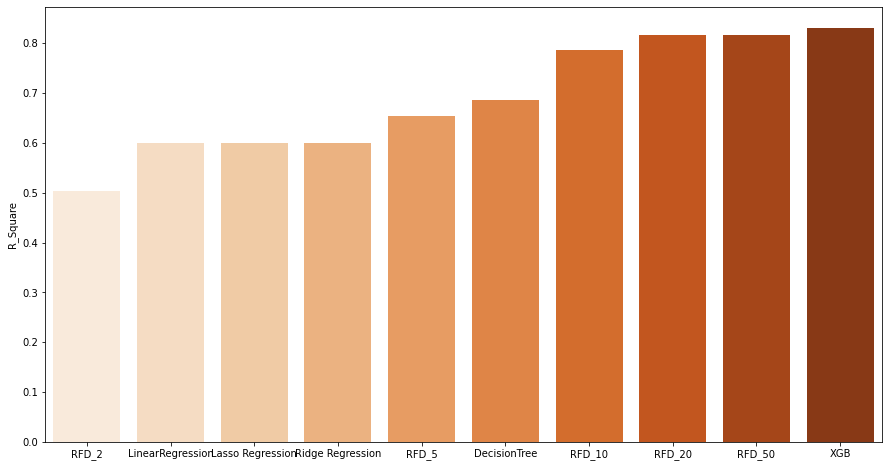

In [77]:
fig1, ax2 = pyplot.subplots(figsize=(15,8))
sns.barplot(x=accuracy_model.index,y='R_Square',data=accuracy_model,ax=ax2,palette='Oranges')

We can see that by the use of XGBoost regression we are getting r squared value is 0.83.

Hence  'XGBoost' could be the best model because of low mean square error and a high r square value .